# ***Importing dependencies***

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')


from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score


# ***Loading of Dataset and Initial Inspection***

In [ ]:
df = pd.read_csv('./drive/MyDrive/datasets/churn_bank.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df2 = df.iloc[:, 3:]

RowNumber, CustomerId, and Surname are all irrelevant, thus, they will not be included.

In [ ]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df2['Gender'].replace(to_replace = 'Female', value = 0, inplace = True)
df2['Gender'].replace(to_replace = 'Male', value = 1, inplace = True)

df2['Gender'].unique()

array([0, 1])

In [ ]:
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


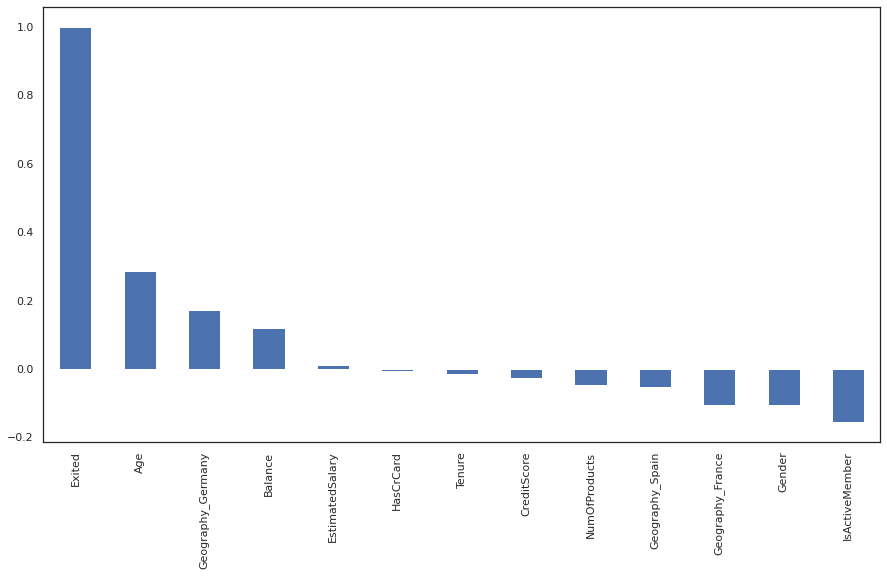

In [ ]:
plt.figure(figsize = (15, 8))
df_dummies.corr()['Exited'].sort_values(ascending = False).plot(kind = 'bar')
plt.show()

*Age, Geography_Germany*, and *Balance* all seem to be positively correlated to churning. On the other hand: *isActiveMember, Gender,* and *Geography_France* all seem to be negatively correlated. Exploration of the patterns is important before delving right into modelling.



# ***EXPLORATORY DATA ANALYSIS***





> Distribution of customers based on their personal information



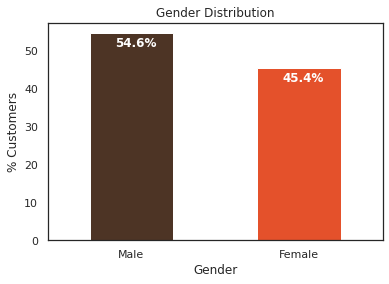

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (df['Gender'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')
    
plt.show()

The number of entries who are Male are greater in numbers compared to the Female entries, although not that significant.

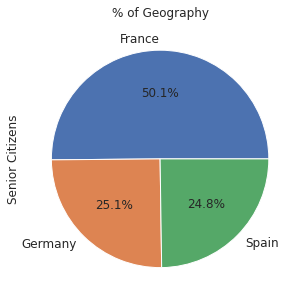

In [ ]:
ax = (df['Geography'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%',figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Geography', fontsize = 12)
plt.show()

The number of people living in France largely dominates the dataset, having more entries than both Germany and Spain combined.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


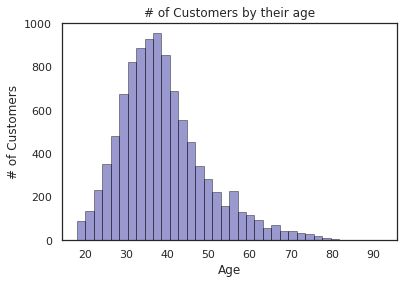

In [ ]:
ax = sns.distplot(df['Age'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Age')
ax.set_title('# of Customers by their age')

plt.show()

Most of the customers are aged around 40 years old. Significant decrease in distribution follows thereafter, with 80 years old and above having the least amount.


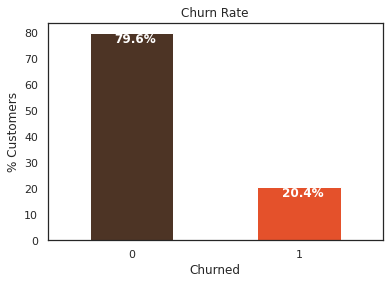

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (df['Exited'].value_counts()*100.0 /len(df)).plot(kind='bar', stacked = True, rot = 0, color = colors)
ax.set_ylabel('% Customers')
ax.set_xlabel('Churned')
ax.set_ylabel('% Customers')
ax.set_title('Churn Rate')

totals = []

for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

As visualization suggests, the dataset largely consists of more customers who have not churned rather than those who have churned, thus, it is expected that the data is skewed as the distribution between the two are far from equal. This is key in understanding the amount of false negatives.



> Personal Information vs Churn Rate



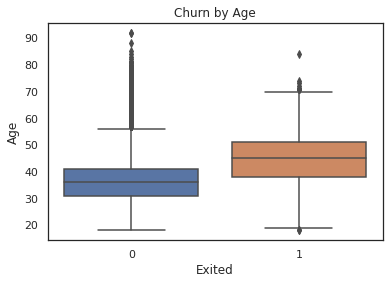

In [ ]:
plt.title('Churn by Age')
sns.boxplot(x = df['Exited'], y = df['Age'])

There is alot of variance in age of customers who have not churned, even reaching the ages of approximately 90 years old

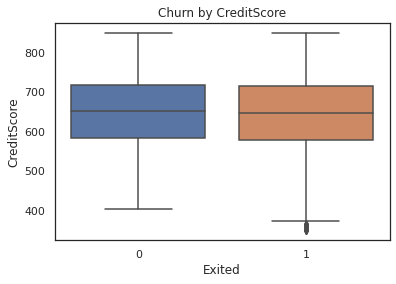

In [ ]:
plt.title('Churn by CreditScore')
sns.boxplot(x = df['Exited'], y = df['CreditScore'])

There isn't much to explain between a customer churning and their credit score, thus having little to no relevance.

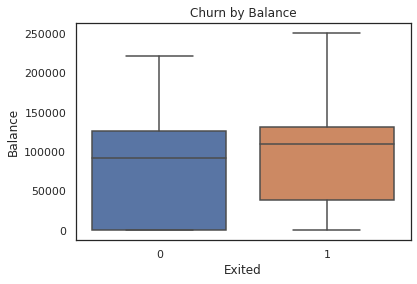

In [ ]:
plt.title('Churn by Balance')
sns.boxplot(x = df['Exited'], y = df['Balance'])

Customers who have more in their balance tend to churn compared to those who have less in their balance.

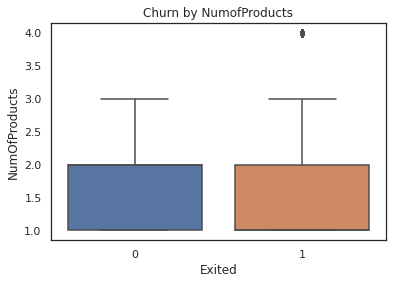

In [ ]:
plt.title('Churn by NumofProducts')
sns.boxplot(x = df['Exited'], y = df['NumOfProducts'])

Customers who have 1-3 in number of products have the same probability of churning, but customers who have 4 products are more likely to churn.

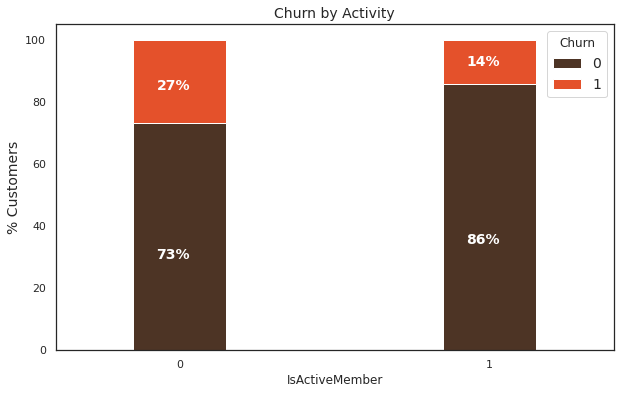

In [ ]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['IsActiveMember','Exited']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6), color = colors)

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Activity',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

Active members are less likely to churn than those who aren't active.

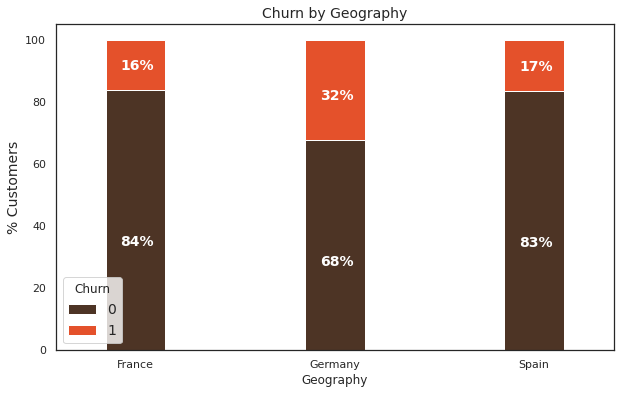

In [ ]:
colors = ['#4D3425','#E4512B']
contract_churn = df.groupby(['Geography','Exited']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar', width = 0.3, stacked = True, rot = 0, figsize = (10,6), color = colors)

ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers',size = 14)
ax.set_title('Churn by Geography',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

While most of the customers are based in France, it relatively has the least amount of customers who have churned, while Germany who has roughly half the amount of customers from France, has the most amount of customers who have churned thus far.

# ***Model Training and Evaluation***



*1. Logistic Regression*
---




> 1A. **MODEL TRAINING** 


---



In [ ]:
y = df_dummies['Exited'].values
X = df_dummies.drop(columns = ['Exited'])

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 26)

In [ ]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)


> 1B. **MODEL EVALUATION** 


---



In [ ]:
print('Logistic Regression Score:', accuracy_score(y_test, y_pred))

Logistic Regression Score: 0.817


AxesSubplot(0.125,0.125;0.775x0.755)


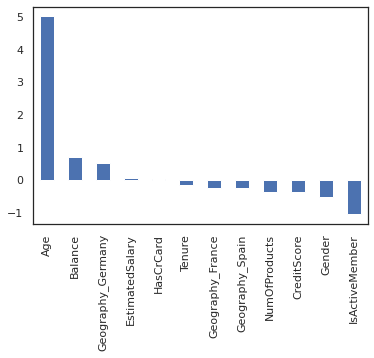

In [ ]:
weights = pd.Series(model_logreg.coef_[0], index = X.columns.values)
print(weights.sort_values(ascending = False).plot(kind = 'bar'))

Observations made with Logistic Regression:


*   Age is positively correlated with churning, therefore the probability of churning increases with the age of the customers
*   Amongst all the features, being an active member is the most negatively correlated with churning, therefore active members are the least likely to churn





*2. Random Forest Classifier*
---



> 2A. **MODEL TRAINING**



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

model_rfc = RandomForestClassifier(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 26, max_features = 'auto', max_leaf_nodes = 30)
model_rfc.fit(X_train, y_train)

y_pred1 = model_rfc.predict(X_test)

> 2B. **MODEL EVALUATION**



In [ ]:
print("Random Forest Classifier:", accuracy_score(y_test, y_pred1))

Random Forest Classifier: 0.8685


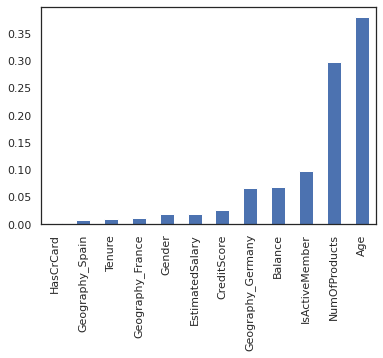

In [ ]:
impt = model_rfc.feature_importances_
weights_rfc = pd.Series(impt, index = X.columns.values)

weights_rfc.sort_values().plot(kind = 'bar')

In terms of Random Forest Classifier, the most important feature remains to be the Age, however, this time NumOfProducts exponentially arose in relevance, while HasCrCard remains to be irrelevant/unimportant.



*3. Support Vector Classifier*
---




> 3A. **MODEL TRAINING** 



In [ ]:
model_svc = SVC(kernel = 'poly')
model_svc.fit(X_train, y_train)
y_pred2 = model_svc.predict(X_test)



> 3B. **MODEL EVALUATION** 



In [ ]:
print('Support Vector Classifier:', accuracy_score(y_pred2, y_test))

Support Vector Classifier: 0.862




*4. ADA Boost Classifier*
---




> 4A. **MODEL TRAINING** 



In [ ]:
model_ada = AdaBoostClassifier()

model_ada.fit(X_train, y_train)
y_pred3 = model_ada.predict(X_test)


> 4B. **MODEL EVALUATION** 



In [ ]:
print('ADA Boost Classifier:', accuracy_score(y_pred3, y_test))

ADA Boost Classifier: 0.858




*5. XGBoost Classifier*
---




> 5A. **MODEL TRAINING** 



In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred4 = model_xgb.predict(X_test)


> 5B. **MODEL EVALUATION**




In [ ]:
print('XGBoost Classifier:', accuracy_score(y_pred4, y_test))

XGBoost Classifier: 0.8705


XGBoost has the highest accuracy among all the techniques demonstrated above, albeit being retrospectively expensive. It achieves this accuracy relatively faster, because of its parallel computing capabilities.

Out of all the models, the XGBoost provided the highest accuracy, while, in contrast, Logistic Regression had the lowest score. 